In [1]:
import requests
import json
from requests.adapters import HTTPAdapter, Retry
from dotenv import load_dotenv
from openai import OpenAI 
import os

In [2]:
load_dotenv()

True

In [3]:
MODEL="gpt-4o"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

## Assistant using Text as prompt input

### Simple Limits problem to solve basic substituion should work 

In [4]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, 
    {"role": "user", "content": "Hello! Evaluate the limit as x approaches 2 of the expression 8 - 3x + 12x^2 ?"}
  ]
)

print("Assistant: " + completion.choices[0].message.content)


Assistant: Sure, I'd be happy to help you with that!

To evaluate the limit as \( x \) approaches 2 for the expression \( 8 - 3x + 12x^2 \), we can directly substitute \( x = 2 \) into the expression since it is a polynomial, and polynomials are continuous everywhere.

So, let's substitute \( x = 2 \):
\[
8 - 3(2) + 12(2^2)
\]

Now, we can calculate step by step:
\[
= 8 - 3 \cdot 2 + 12 \cdot 2^2
\]
\[
= 8 - 6 + 12 \cdot 4
\]
\[
= 8 - 6 + 48
\]
\[
= 2 + 48
\]
\[
= 50
\]

Therefore, the limit as \( x \) approaches 2 of the expression \( 8 - 3x + 12x^2 \) is \( 50 \).


## Assistant using a URL picture of a problem to solve

In [42]:
import matplotlib.pyplot as plt
import re
from IPython.display import Image, display, Audio, Markdown
import base64
from PIL import Image as PILImage
from io import BytesIO

IMAGE_PATH = 'https://qph.cf2.quoracdn.net/main-qimg-9a49a57343520888d309ee221db66e6a'

In [45]:
# Function to display image from URL
def display_image_from_url(url):
    response = requests.get(url)
    img = PILImage.open(BytesIO(response.content))
    display(img)

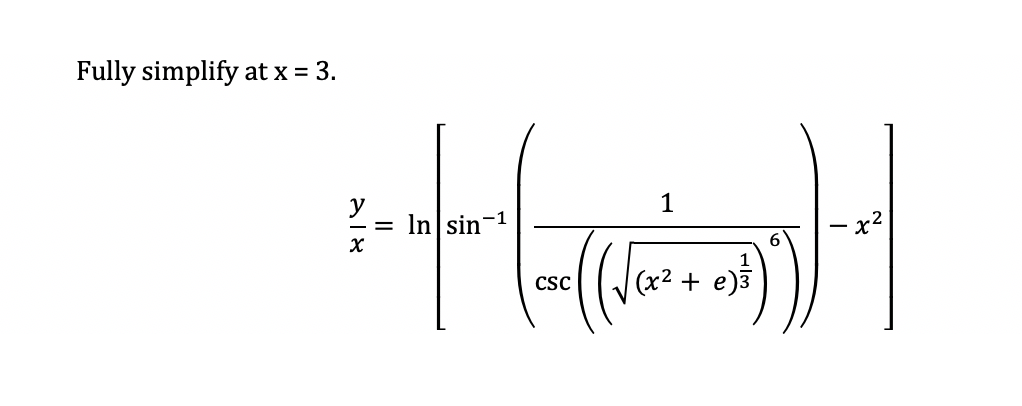

In [46]:
display_image_from_url(IMAGE_PATH)

### Solve the problem above 

In [47]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "Fully simplify at x=3?"},
            {"type": "image_url", "image_url": {
                "url": IMAGE_PATH}
            }
        ]}
    ],
    temperature=0.0,
)
str_result = response.choices[0].message.content
#print(response.choices[0].message.content)

In [48]:
#str_result

In [49]:
# Function to render LaTeX as an image
def render_latex(latex, filename):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.text(0.5, 0.5, f'${latex}$', horizontalalignment='center', verticalalignment='center', fontsize=20)
    ax.axis('off')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

In [50]:
# Extract LaTeX expressions from the payload
latex_expressions = re.findall(r'\\\[(.*?)\\\]', str_result, re.DOTALL)

In [51]:
latex_expressions

[' \\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc \\left( \\left( \\sqrt{x^2 + e} \\right)^{\\frac{1}{3}} \\right)^6} \\right) - x^2 \\right) ',
 ' \\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc \\left( \\left( \\sqrt{3^2 + e} \\right)^{\\frac{1}{3}} \\right)^6} \\right) - 3^2 \\right) ',
 ' 3^2 + e = 9 + e ',
 ' \\sqrt{9 + e} ',
 ' \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} ',
 ' \\csc \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right) ',
 ' \\csc \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right) = \\frac{1}{\\sin \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right)} ',
 ' \\left( \\frac{1}{\\sin \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right)} \\right)^6 = \\frac{1}{\\sin^6 \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right)} ',
 ' \\frac{1}{\\frac{1}{\\sin^6 \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right)}} = \\sin^6 \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\r

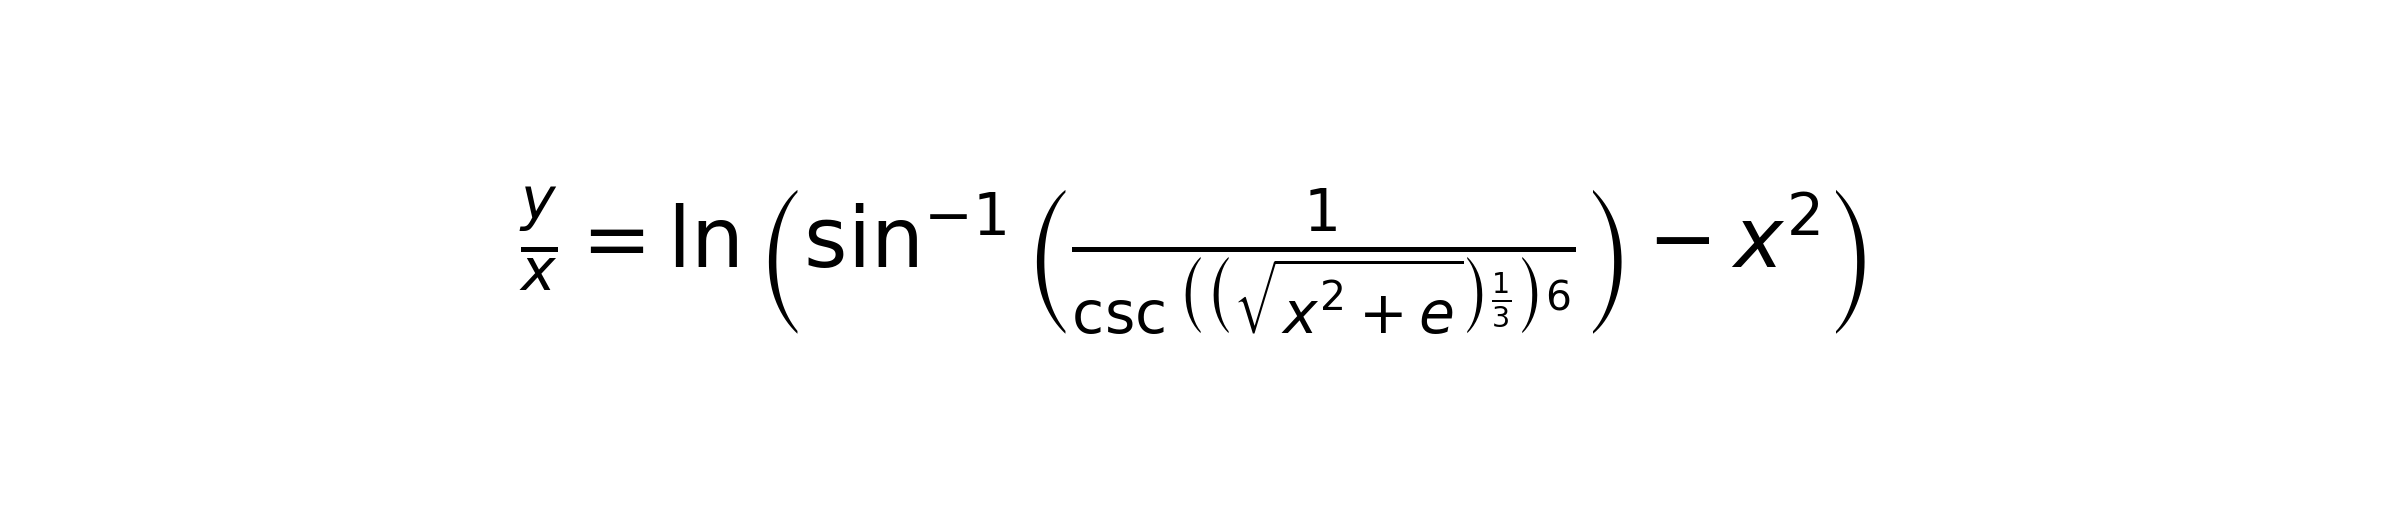

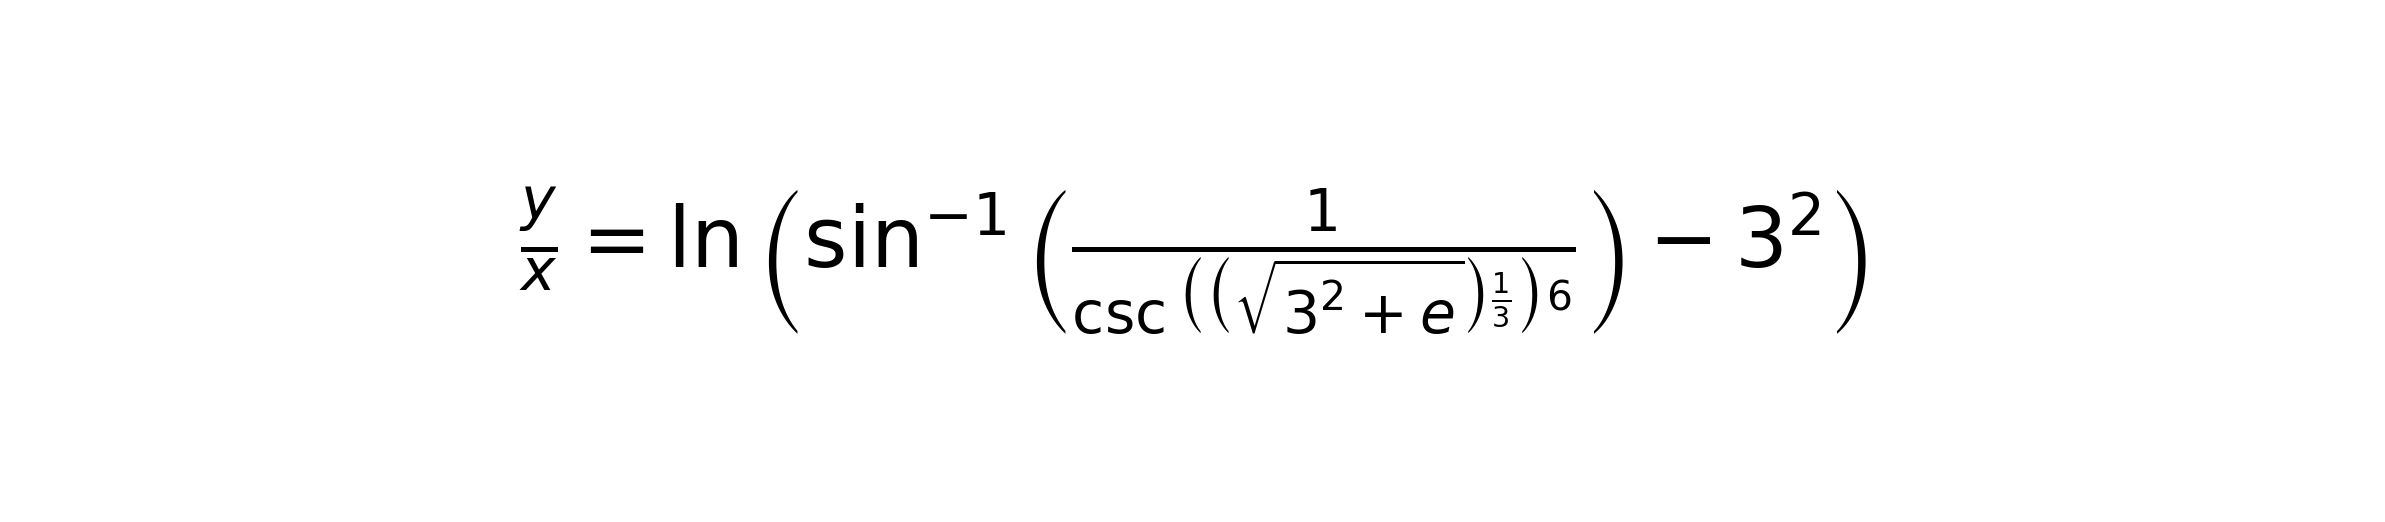

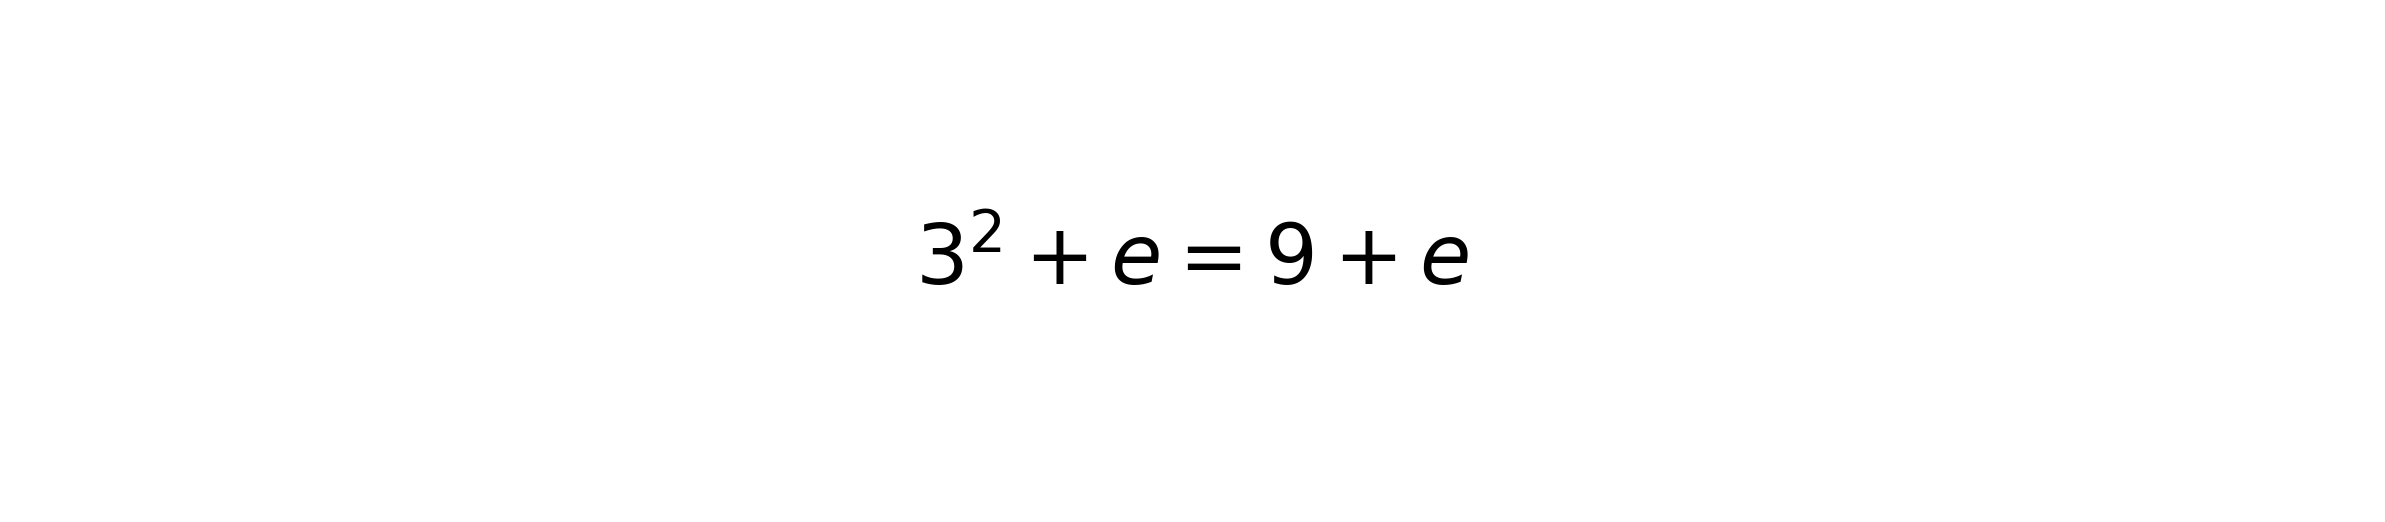

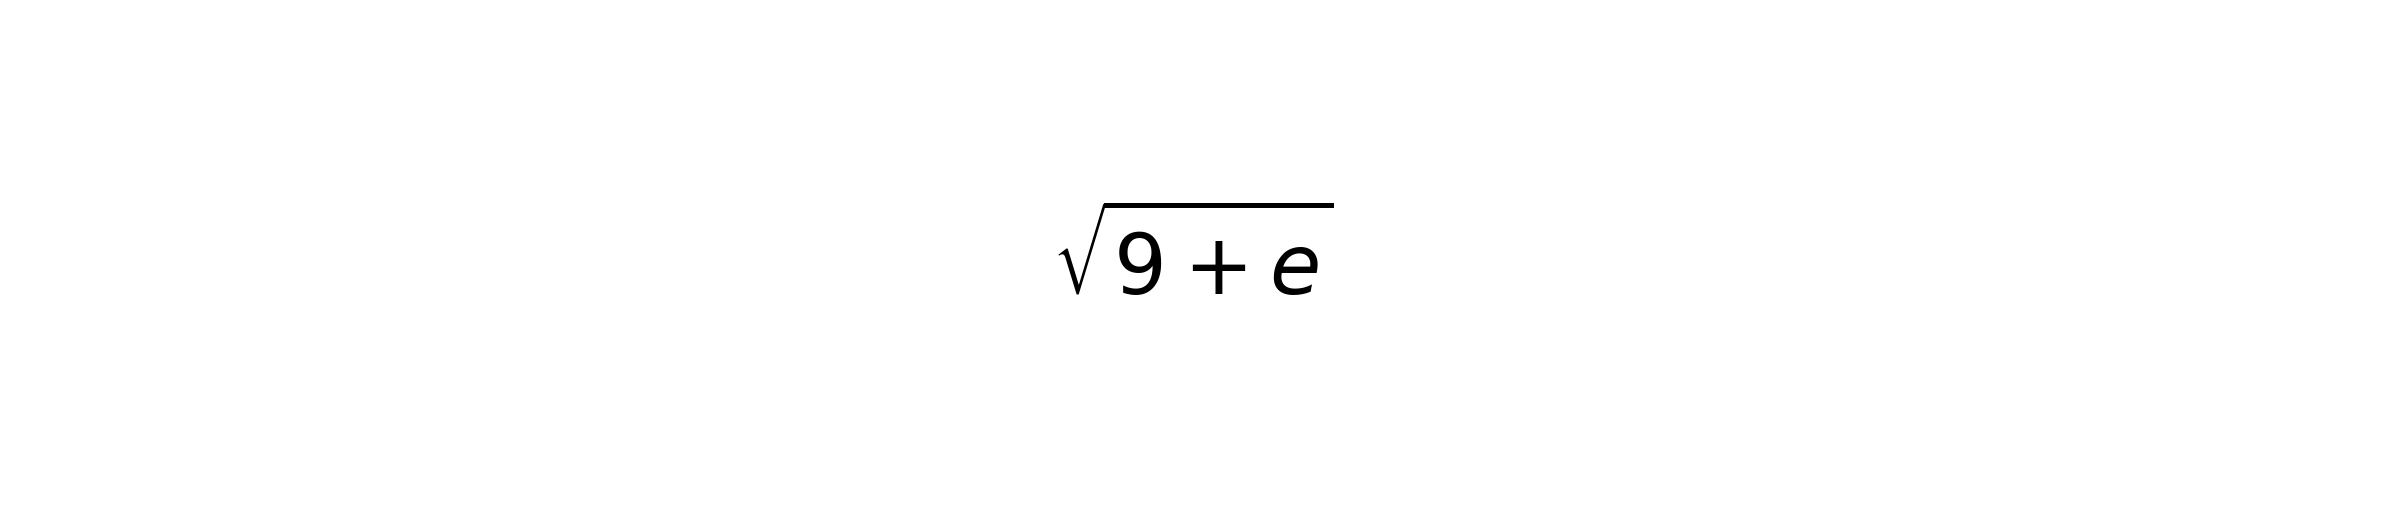

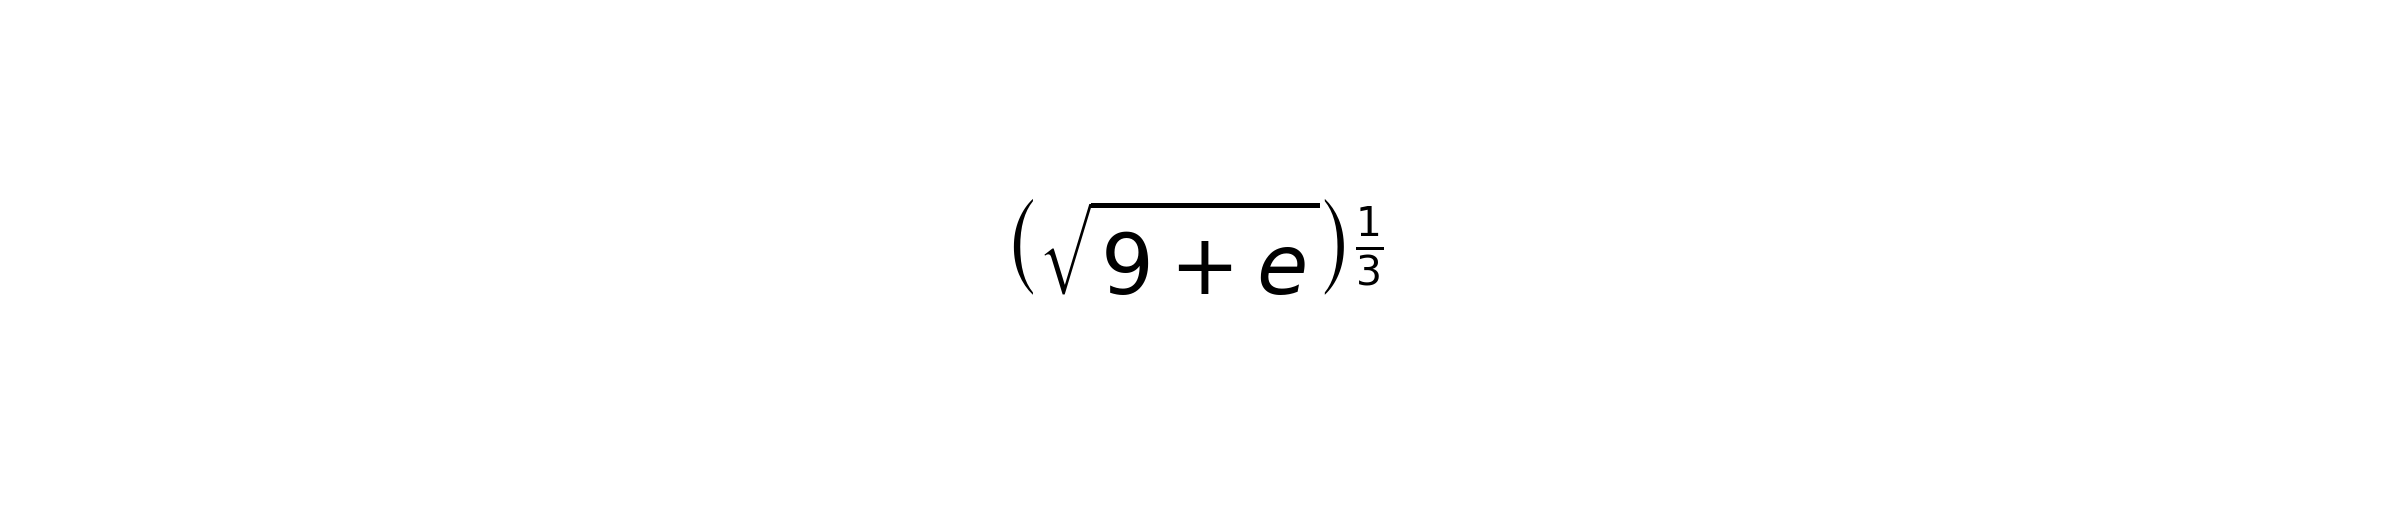

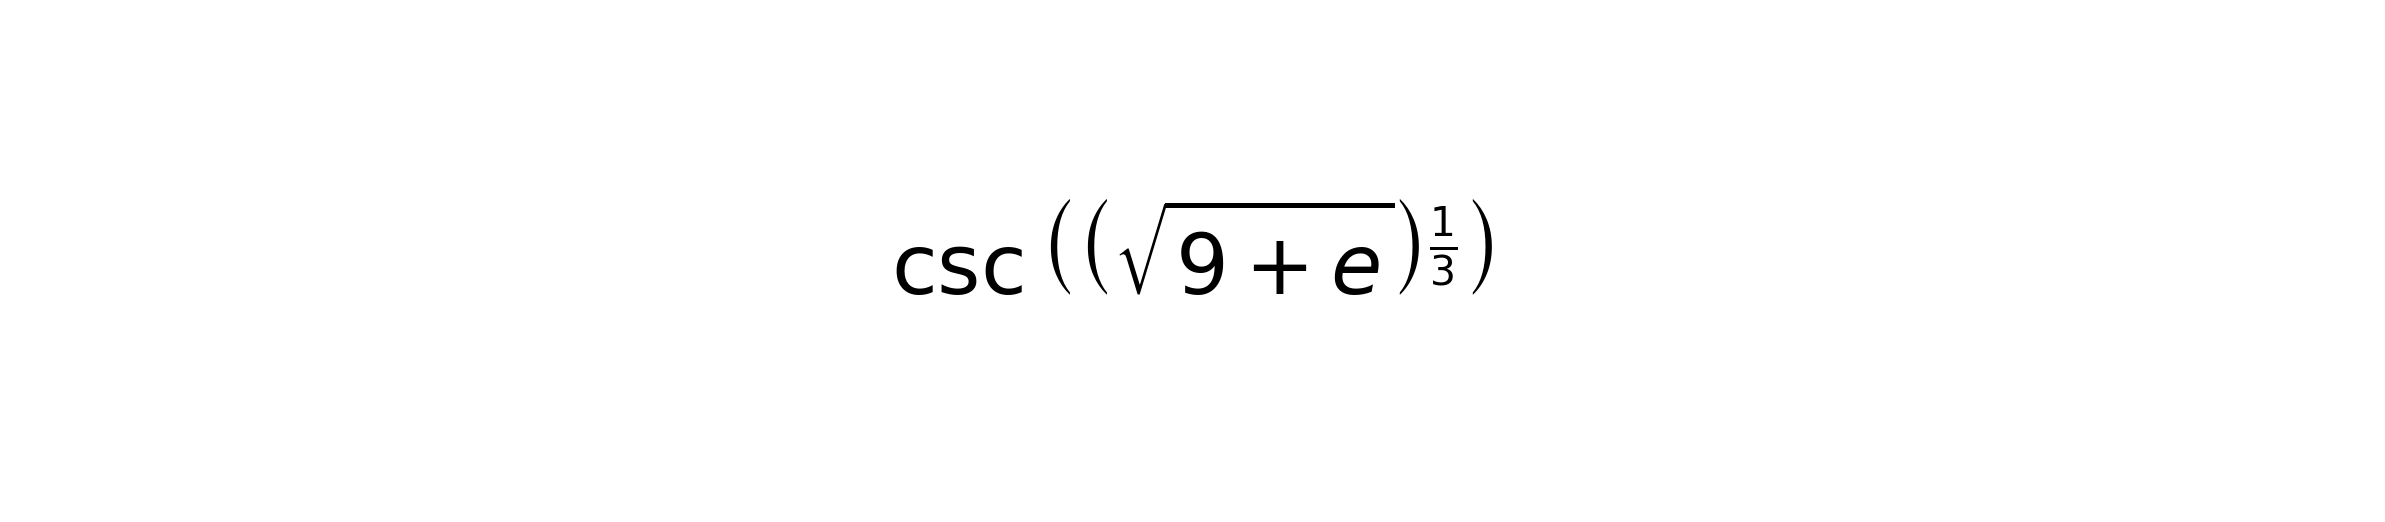

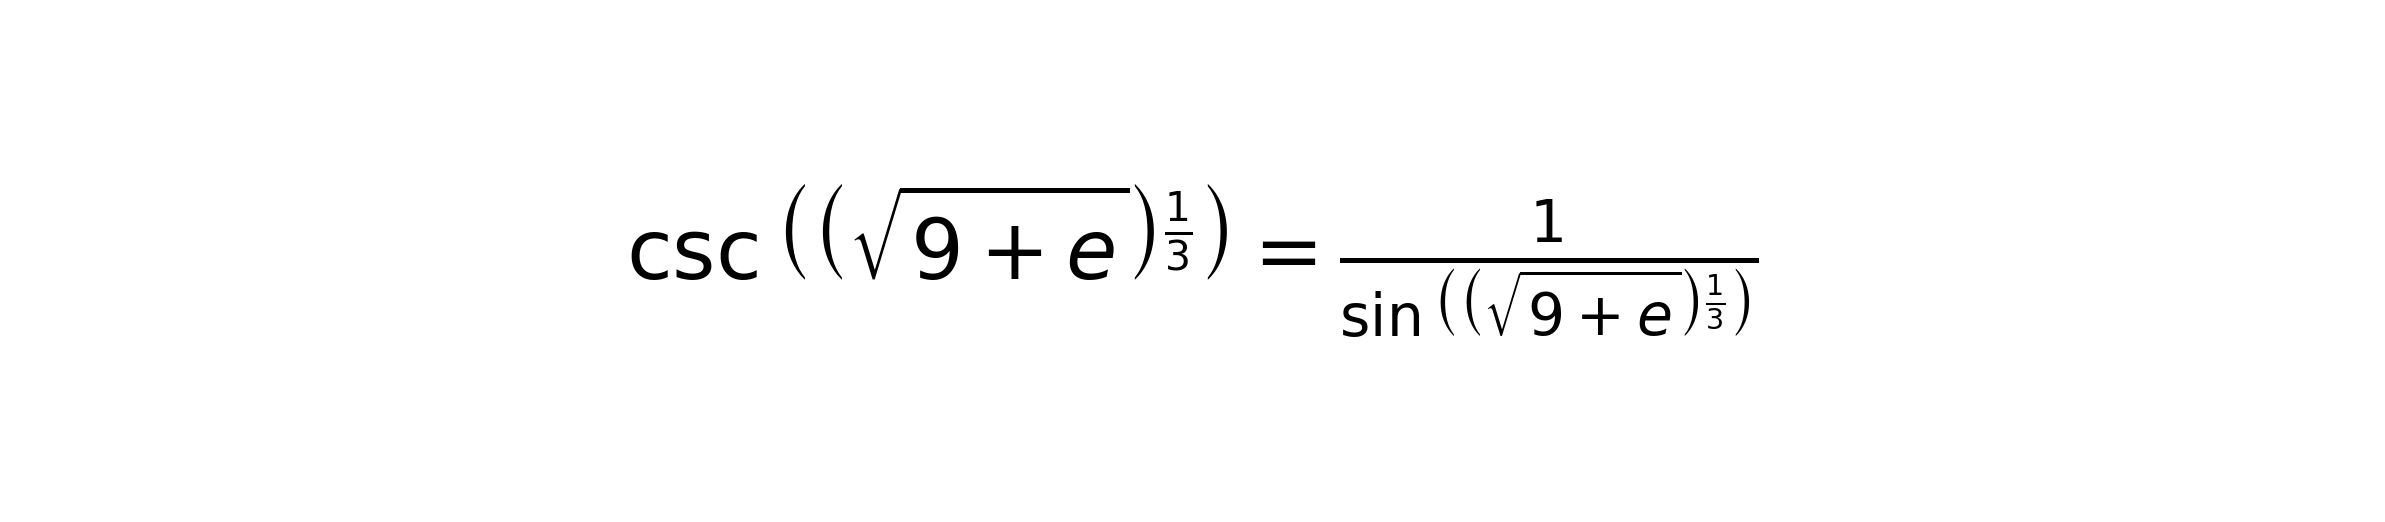

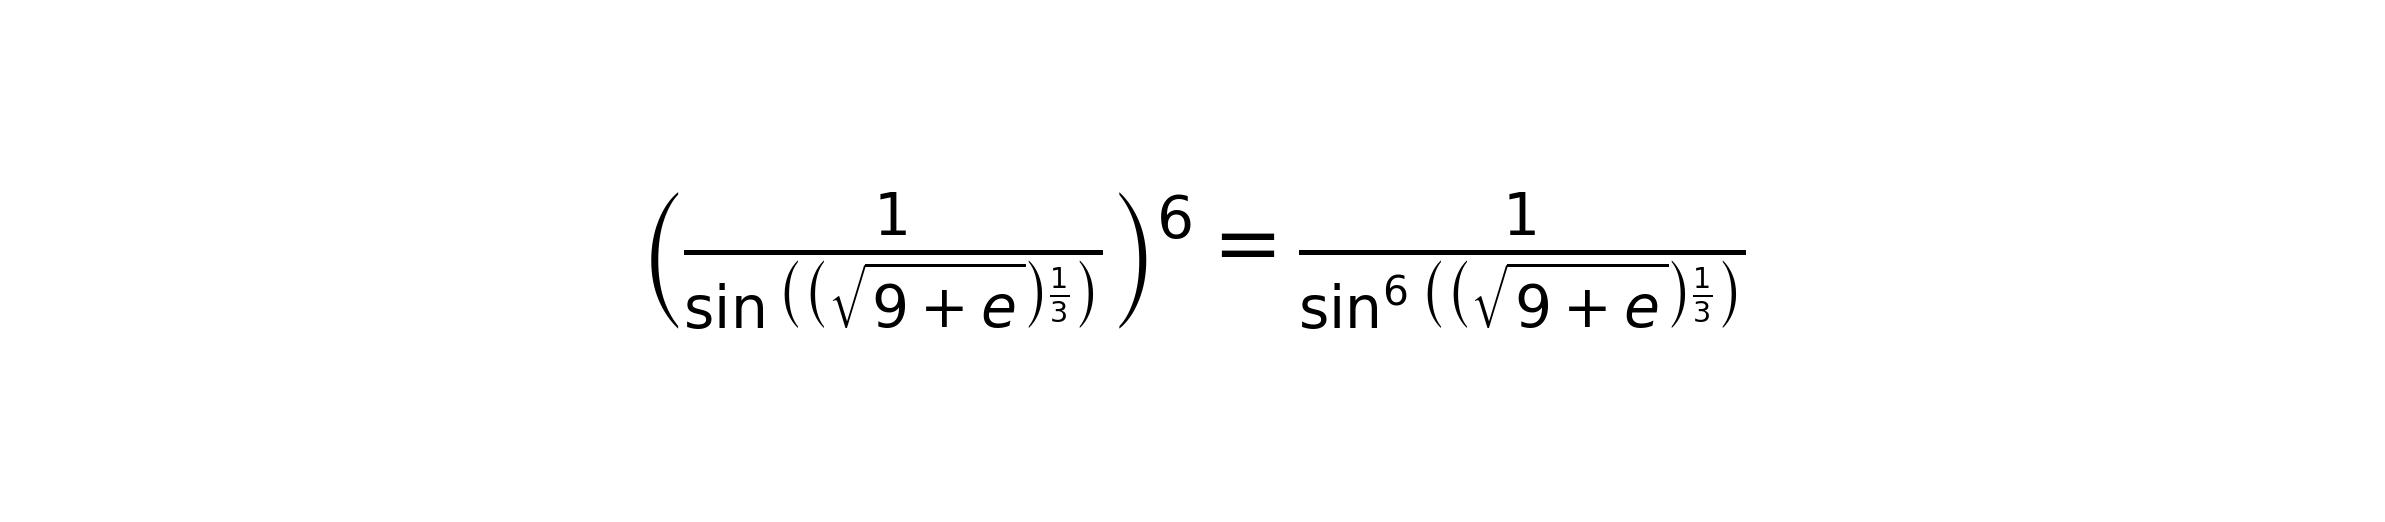

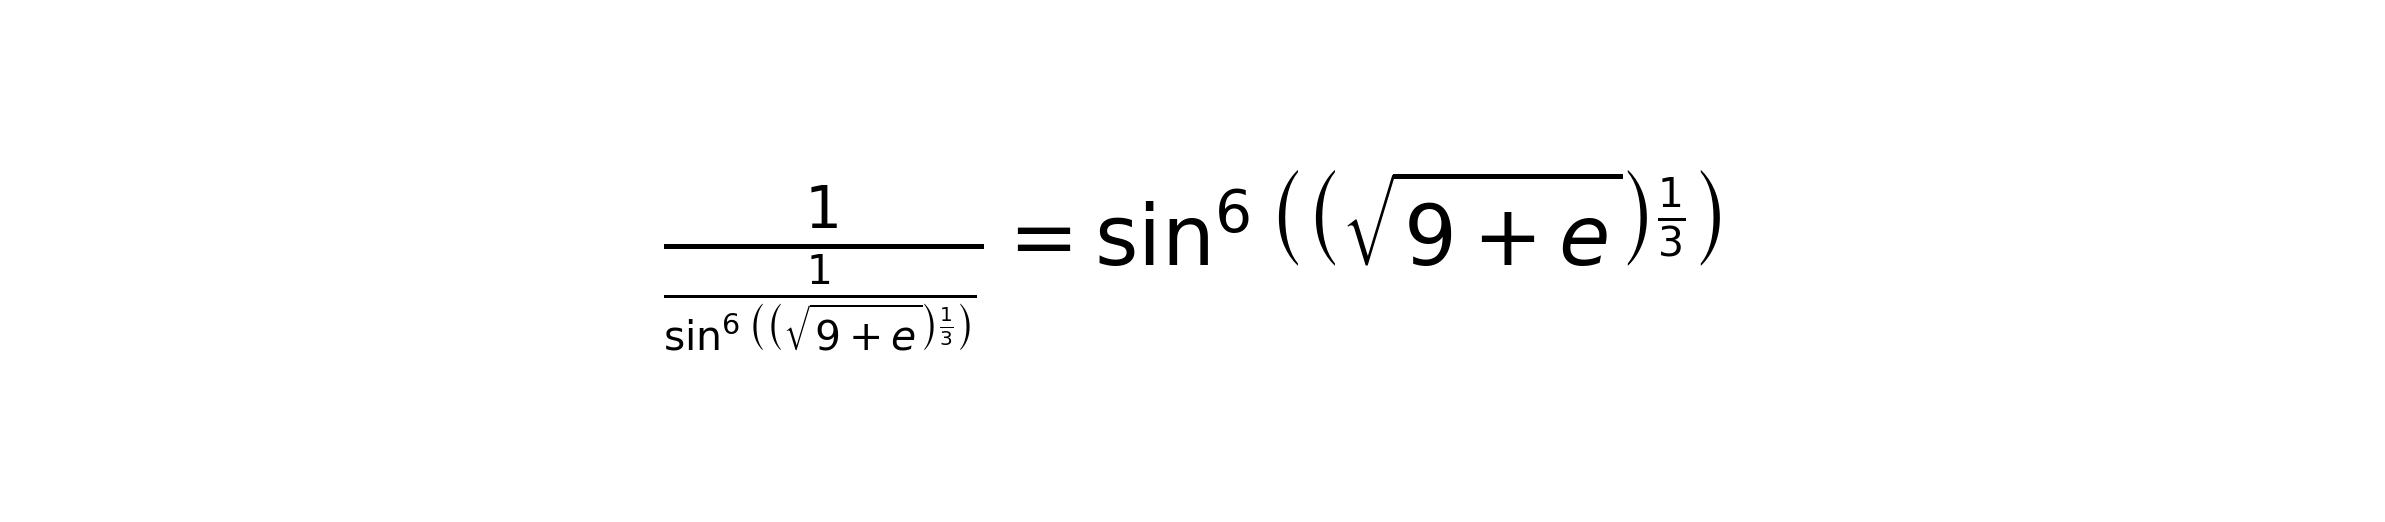

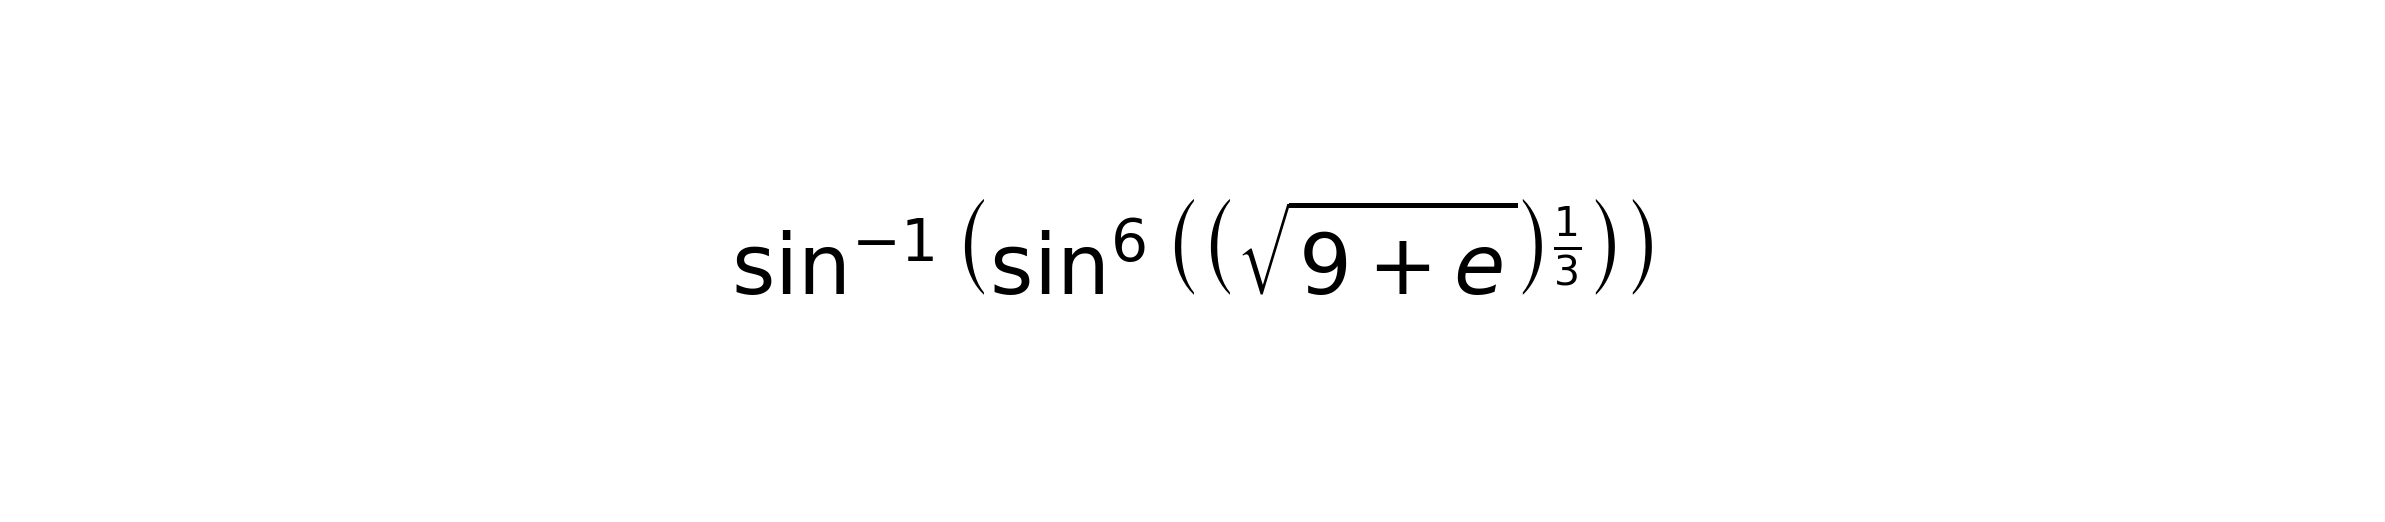

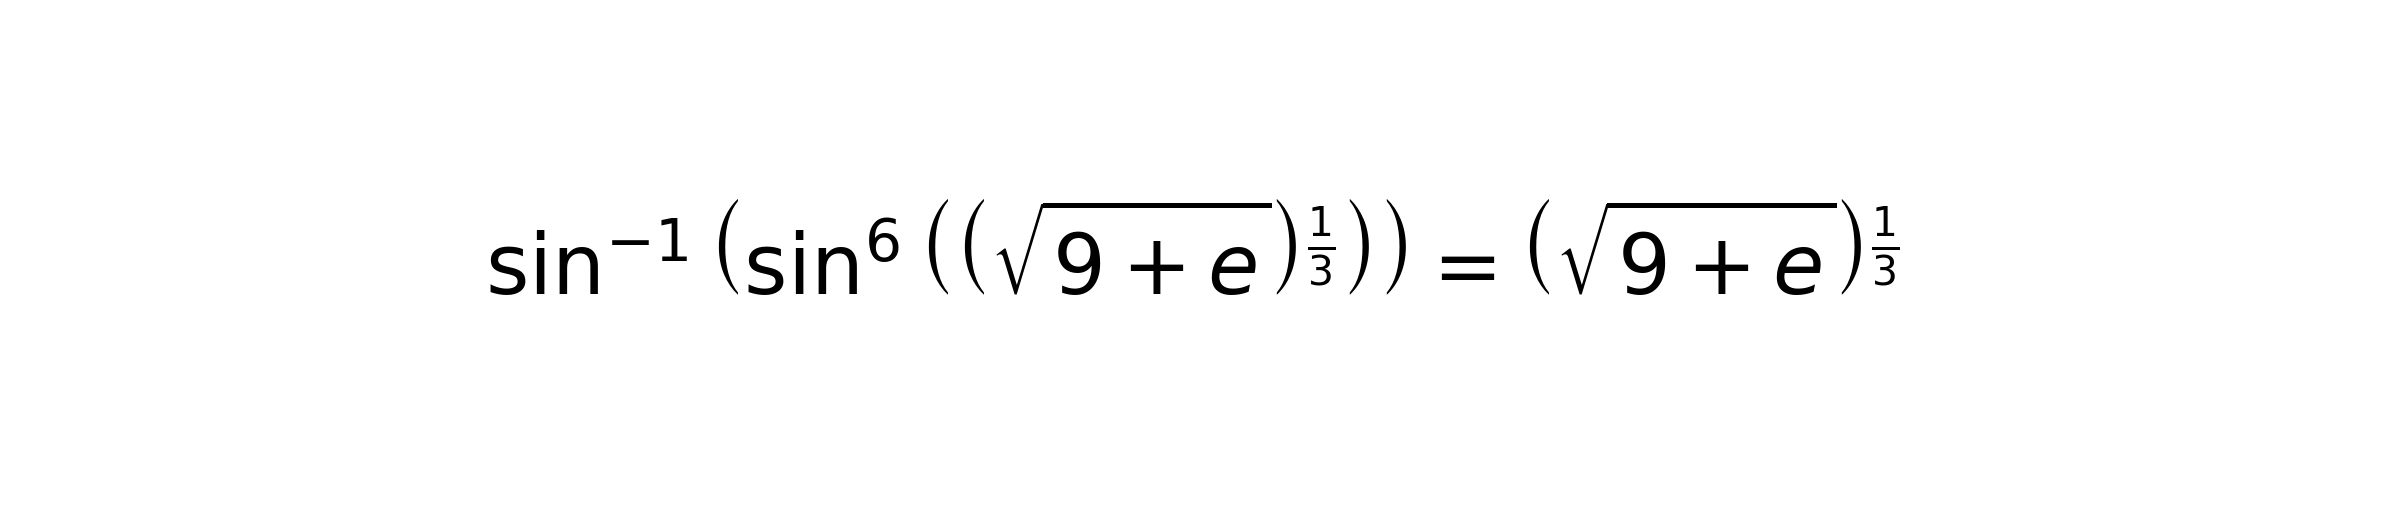

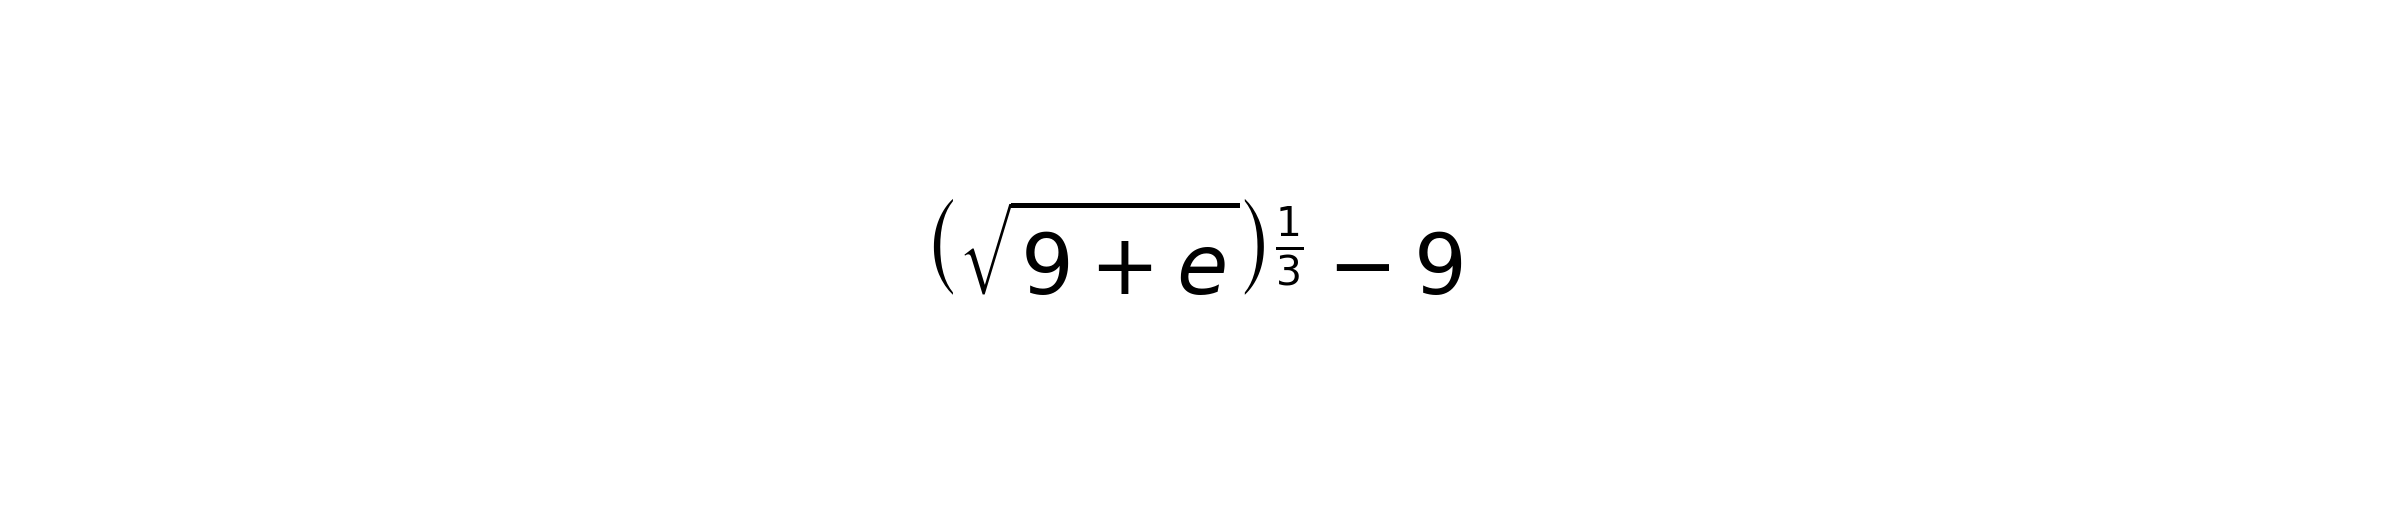

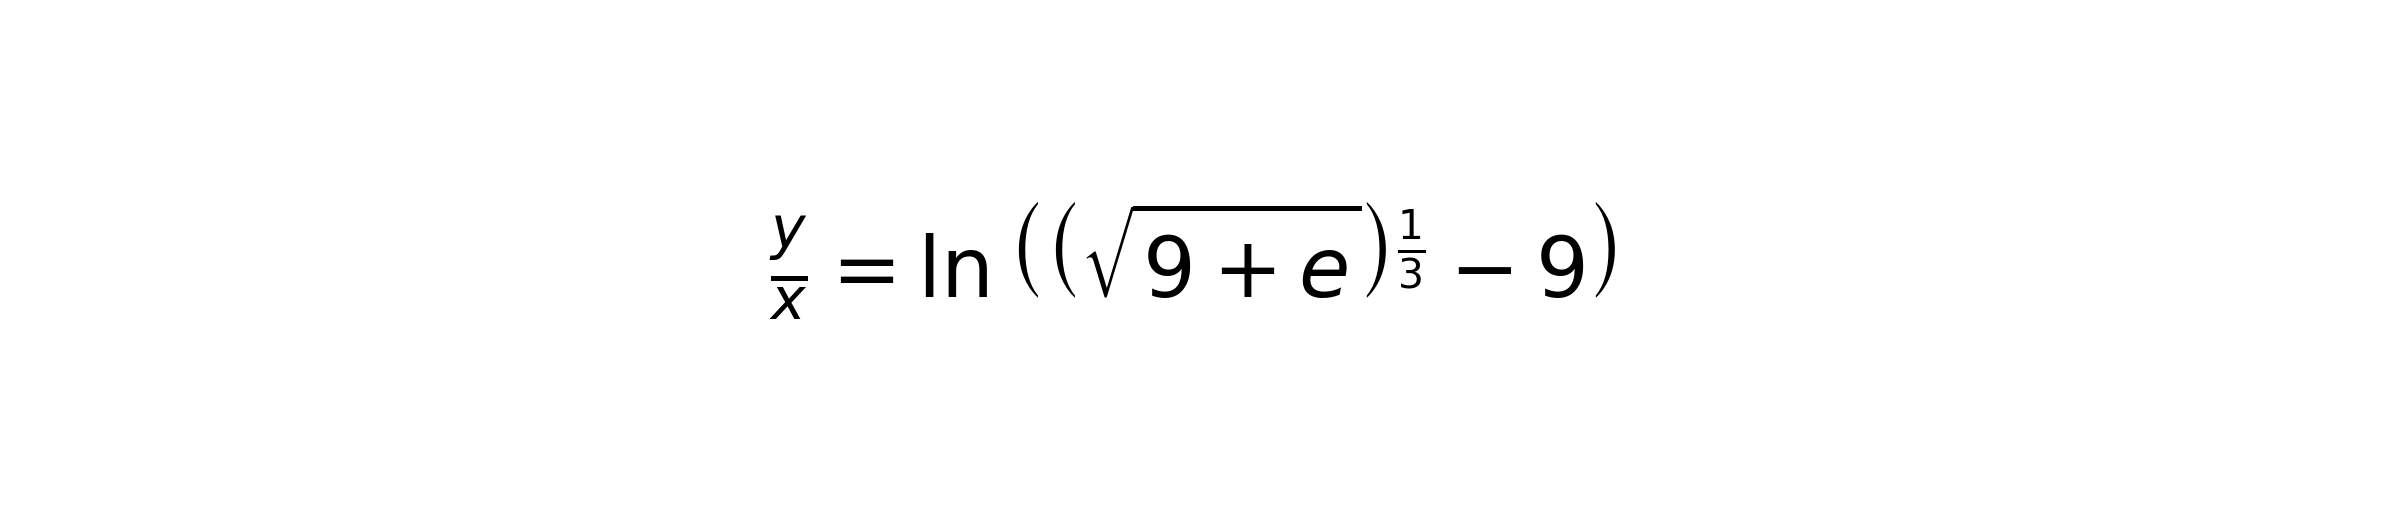

In [52]:
# Render each LaTeX expression as an image and display it
for i, latex in enumerate(latex_expressions):
    latex = latex.strip()  # Clean up the LaTeX expression
    filename = f'latex_{i}.png'
    render_latex(latex, filename)
    display(Image(filename))